# Segundo examen

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/raw/master/material/figures/leastaction_pendulum.svg?sanitize=true">
</div>
Un observador mirando el movimiento de un péndulo simple con una masa en el extremo de $0.2\ \text{Kg}$ y una longitud  $l=1\ \text{m}$, activa un cronómetro cuando el péndulo, oscilando de izquierda a derecha, se encuentra en su posición vertical. El observador detiene el cronómetro después de un tiempo de $t_f=0.5026\ \text{s}$, justo cuando el péndulo alcanza su máxima altura formando un ángulo de $\theta_0=10^\circ$ con respecto a la vertical. Por lo tanto $t_f=T/4$, donde , donde $T$ es el período de la oscilación del péndulo simple.

1. Minimizando la Acción del péndulo simple, la cual será explicada a continuación,  encuentre la trayectoria angular que describe el extremo del péndulo durante el tiempo de observación: en el plano del ángulo barrido en radianes en función del tiempo esquematizado en la figura. 
2. Grafique dicha trayectoria en plano $\theta(t)$ vs $t$ y compare con la superposición del gráfico de la ecuación de movimiento $\theta(t)=\theta_0 \sin(\omega t)$, donde $\omega$ es la frecuencia angular de la oscilación del péndulo simple, dada por $\omega=2\pi/T$.
3. Compruebe que la trayectoría que minimiza la Acción también conserva la energía total: $E=K+V$, donde $K$ es la energía cinética del péndulo y $V$ es su energía potencial.

## Acción para un péndulo simple

<div style="float: right;" markdown="1">
    <img src="https://github.com/restrepo/ComputationalMethods/raw/master/material/figures/pendulum.png">
</div>
Vamos a tomar como origen del sistema de referencia el extremo inferior del péndulo en su posición vertical. Por lo tanto, la altura del extremo inferior del péndulo a un ángulo $\theta$ com se muestra en la figura, es
$$
y=l-l\cos\theta=l(1-\cos\theta)\,.
$$
Entonces

* Energía potencial
$$
V=mgy=mgl(1-\cos\theta).
$$
* Como la velocidad de la masa es $v=l\dot\theta$, tenemos que la energía cinética es
$$
K=\frac{1}{2}m v^2=\frac{1}{2}ml^2\dot\theta^2\,,
$$
donde $\dot\theta=d\theta/dt\,.$. 

La Lagrangiana, en función de las coordenadas generalizadas $\theta$ y $\dot\theta$ es
$$
L=K-V=\frac{1}{2}ml^2\dot\theta^2-mgl(1-\cos\theta)\,,
$$
y, finalmente, la Acción a minimizar para encontrar la trayectoria física $\theta(t)$, es
$$
S=\int_0^{t_f} L\,\operatorname{d}t\,.
$$

Para los detalles ver: http://www.aoengr.com/Dynamics/LagrangianMechanicsPendulum.pdf

In [0]:
import numpy as np
import scipy.optimize 
import pandas as pd
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [0]:
#los ángulos inicial (xini) y final (xend) se deben ingresar en radianes
theta_cero = 10
final_angle = theta_cero * np.pi/180

def S(x,tend=0.5026,m=0.2,xini=0.,xend= final_angle,g=9.8):
    x=np.asarray(x)
    t=float(tend)
    Dt=t/x[:-1].size
    x[0]=xini
    x[-1]=xend
    return ((0.5*m*(x[1:]-x[:-1])**2/Dt**2-m*g*(1-np.cos(0.5*(x[1:]+x[:-1]))))*Dt).sum()

In [0]:
#Ingresar ángulo final en radianes

def theta_fit(n,t=0.5026,m=0.2,xini=0.,xend=final_angle,ftol=1E-8):
    
    #xini=xini*np.pi/180
    #xend=xend*np.pi/180

    t=float(t)
    if n%2==0:
        print ('x debe contener un número impar de elementos')
        sys.exit  
  
    x0=np.zeros(n)
    a=optimize.fmin_powell(S,x0,args=(t,m,xini,xend),ftol=ftol,full_output=1)
    x=a[0]
    x[0]=xini;x[-1]=xend
    xmax=np.sort(x)[-1]
    Smin=a[1]
    Dt=t/x[:-1].size 
    return x,xmax,Smin,Dt

In [73]:
t=0.5026
m=0.2
y=theta_fit(11,t,m)
theta = y[0]
theta_max=y[1]
Smin=y[2]
Dt=y[3]
t_theta=np.arange(0,t+Dt,Dt)

Optimization terminated successfully.
         Current function value: 0.000020
         Iterations: 19
         Function evaluations: 2612


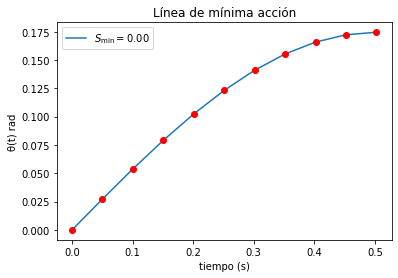

In [74]:
plt.plot(t_theta,theta,label='$S_{\mathrm{min}}=$%.2f' %Smin)
plt.plot(t_theta,theta,'ro')
plt.ylabel('θ(t) rad')
plt.xlabel('tiempo (s)')
plt.title('Línea de mínima acción')
plt.legend(loc='best')

In [0]:
#Hallemos T y ω
T = t * 4
ω = 2 * np.pi / T
mov_theta = lambda x:final_angle * np.sin(ω*x)

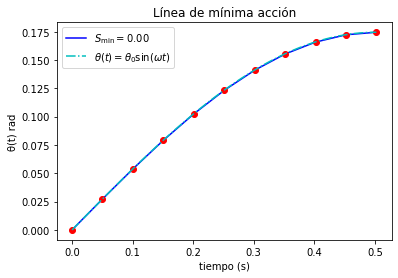

In [103]:
tt = np.linspace(0,t,100)
plt.plot(t_theta,theta,'b',label='$S_{\mathrm{min}}=$%.2f' %Smin)
plt.plot(t_theta,theta,'ro')
plt.plot(tt,mov_theta(tt),'c-.',label = '$θ(t)=θ_{0} \sin(\omega t)$')
plt.ylabel('θ(t) rad')
plt.xlabel('tiempo (s)')
plt.title('Línea de mínima acción')
plt.legend(loc='best')

Con la gráfica anterior se evidencia que se superponen las trayectorias en plano $\theta(t)$ vs $t$ la ecuación de movimiento $\theta(t)=\theta_0 \sin(\omega t)$

Ahora calculemos los campos necesarios para mostrar que la trayectoría que minimiza la Acción también conserva la energía total: $E=K+V$

In [111]:
#velocidad
v=(theta[1:]-theta[:-1])/Dt
#aceleración
a = (v[1:]-v[:-1])/Dt
#gravedad
g = 9.8
#Energía cinética
K=0.5*m*v**2
#Energía potencial
V=m*g*(1-np.cos(0.5*(theta[1:]+theta[:-1])))
#Energía total
E=T+V

print(np.round(E,1))

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
